In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

In [2]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.8 MB/s eta 0:00:00


In [4]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

In [7]:
# 파일 읽어오기
df_original = pd.read_csv('/content/drive/MyDrive/학술제/DF_.csv')

# 여기서 사용할 파일
n = 500 # 사용할 데이터의 초 (* 10)
rp = random.randint(0, df_original.shape[0] - n)
df = df_original.iloc[rp:rp + 500,]
df = df.drop(['Trip', 'Route_Area', 'Date', 'Weather'], axis = 1)
df = df.reset_index(drop = True)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df.head(1)

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],max. Battery Temperature [°C],SoC [%],Heating Power CAN [kW],Requested Heating Power [W],AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C],usage
0,196.6,19.7,575.0,26.69,8.09,0.01,0.0,386.24,-14.0,9.0,10.0,81.8,3.69,3680.0,0.0,1,-3.0,54.0,12.5,0.8


In [9]:
def go_arima(target, step, save = False):
    d = ndiffs(df[target])
    model = pm.auto_arima(df[target], d=d)
    # print(result_time.summary())
    forecast = model.predict(n_periods=step)

    # 예측 결과 시각화
    forecast_index = range(len(df[target]), len(df[target]) + step)
    plt.plot(df[target], label='Original Data')
    plt.plot(forecast_index, forecast, color='red', label='predict Data')
    # plt.fill_between(forecast_index,
    #                  forecast.conf_int()['lower value'],
    #                  forecast.conf_int()['upper value'], color='pink', alpha=0.3)
    plt.title(target)
    plt.legend()
    plt.show()
    if save == True:
        plt.savefig(f'./{target}_arima_chart')

    return forecast

In [10]:
# 결과값만 추출
def pridict_arima(target, step):
    d = ndiffs(df[target])
    model = pm.auto_arima(df[target], d=d)
    # print(result_time.summary())
    forecast = model.predict(n_periods=step)

    return forecast

In [11]:
df['Time [s]'].iloc[-1]

246.5

In [12]:
# Arima 사용해서 예측할 것과 아닌 것 구분
arima_col = ['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Regenerative Braking Signal ',
             'Battery Voltage [V]', 'Battery Current [A]', 'SoC [%]']
normal_col = df.drop(arima_col, axis = 1).drop('usage', axis = 1)

# 새로운 데이터 생성해 내기 (미래 데이터 생성)
future_data = pd.DataFrame()
for i in normal_col:
    future_data[i] = [df[i].iloc[-1]] * 500
for i in arima_col:
    future_data[i] = pridict_arima(i, 500).reset_index(drop = True).round(2)

In [17]:
# usage 생성해 내기

# 모델 불러오기
model = load_model('/content/rnn_model (1).keras')

In [18]:
# usage 예측
X = future_data
scaler = StandardScaler()
X = scaler.fit_transform(X) #표준화
X = X.reshape((X.shape[0], X.shape[1], 1))

predict = model.predict(X)

16/16 [==============================] - 1s 7ms/step


In [19]:
predict.shape

(500, 19, 1)

In [22]:
SoC = df['SoC [%]'].values
SoC

array([81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 ,
       81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 ,
       81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 ,
       81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 ,
       81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 , 81.8 ,
       81.8 , 81.79, 81.74, 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 ,
       81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 ,
       81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 ,
       81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 ,
       81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 ,
       81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 ,
       81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 ,
       81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 ,
       81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 , 81.7 ,
       81.7 , 81.7 ,

In [23]:
SoC = SoC.reshape((SoC.shape[0], 1, 1))

In [24]:
efficiency = 0.9  # 배터리 이동 효율성 (예: 90%)

predicted_distance = (SoC * efficiency) - predict
print("예측된 주행 가능 거리:", predicted_distance)

예측된 주행 가능 거리: [[[73.18430846]
  [73.18568491]
  [73.18412587]
  ...
  [73.19952392]
  [73.29754877]
  [73.349527  ]]

 [[73.18430846]
  [73.18568491]
  [73.18412587]
  ...
  [73.19791758]
  [73.27024289]
  [73.3130587 ]]

 [[73.18430846]
  [73.18568491]
  [73.18412587]
  ...
  [73.19649788]
  [73.24890455]
  [73.28492581]]

 ...

 [[72.55430846]
  [72.55568491]
  [72.55412587]
  ...
  [72.55406757]
  [72.55011567]
  [72.53281953]]

 [[72.55430846]
  [72.55568491]
  [72.55412587]
  ...
  [72.55402686]
  [72.55002718]
  [72.53269135]]

 [[72.55430846]
  [72.55568491]
  [72.55412587]
  ...
  [72.55401023]
  [72.54997387]
  [72.53256022]]]


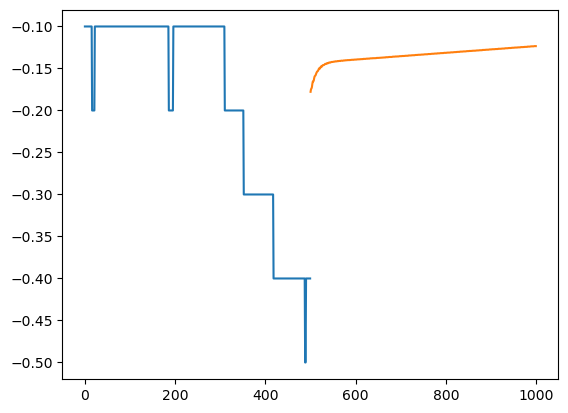

In [ ]:
fig = plt.figure()
plt.plot(np.arange(0, 500), df.usage)
plt.plot(np.arange(500, 1000), predict[:, -1, :])
plt.show()